# **Image Watermarking Project** 


### **1.Importing libraries**

In [1]:
import numpy as np
import cv2
import requests
from PIL import Image
from io import BytesIO

### **2.Uploading the two images**

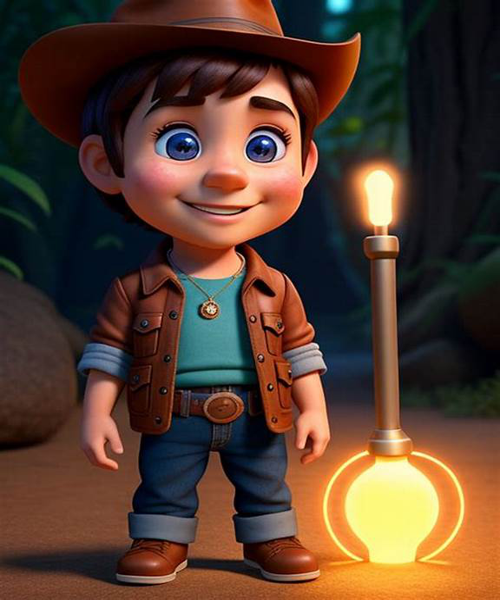

In [2]:
# let's load an image form the web and display it
url ="https://th.bing.com/th/id/OIP.WBi0IWx8QbWZS1d6ZA1tWQHaJ4?w=576&h=768&rs=1&pid=ImgDetMain"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((500,600))
img_text = img.resize((500,600)) # this is the image we will use to draw text on
img

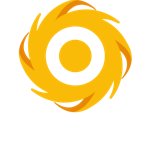

In [5]:
# now we will upload a logo from the web 

url = "https://www.freepnglogos.com/uploads/company-logo-png/company-logo-telestream-press-kit-12.png"

response = requests.get(url)
logo = Image.open(BytesIO(response.content))    
logo = logo.resize((150,150))
logo


### **3.Image processing**

In [150]:
# first we will convert the images to numpy arrays and then extract the shape 
img = np.array(img.convert('RGB'))
logo = np.array(logo.convert('RGB'))

img_height, img_width, _ = img.shape
logo_height, logo_width, _ = logo.shape
print('The image shape is: ', img.shape)
print('The logo shape is :', logo.shape)

The image shape is:  (600, 500, 3)
The logo shape is : (150, 150, 3)


now we will create a region of interest (ROI) where we will place the logo, our ROI will the center of the image 

In [151]:
# first we will calculate the top left corner of the logo

center_x = (img_width - logo_width) // 2
center_y = (img_height - logo_height) // 2

# now we will create the ROI
roi = {
    "bottom_left": (center_x, center_y + logo_height), 
    "top_right": (center_x + logo_width, center_y)
}


print('The ROI is: ', roi)

ROI = img[roi["top_right"][1]:roi["bottom_left"][1], roi["bottom_left"][0]:roi["top_right"][0]] # top_y bottom_y left_x right_x

The ROI is:  {'bottom_left': (175, 375), 'top_right': (325, 225)}


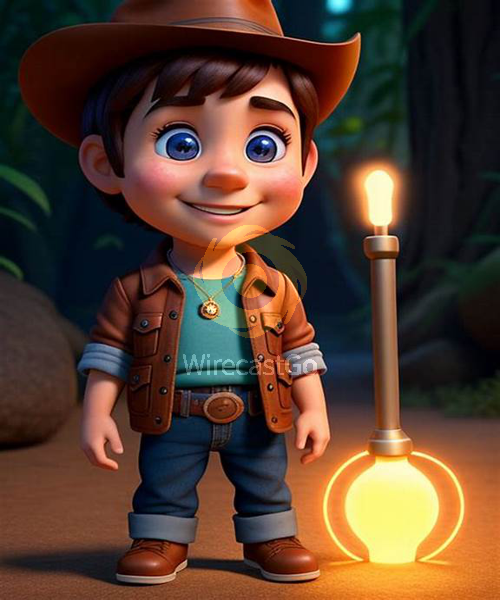

In [152]:
# we will use opencv to merge our logo and our roi.
result = cv2.addWeighted(ROI, 1, logo, 0.2, 0) # cv2.addWeighted(src1, alpha, src2, beta, gamma)

# draw the logo on the image
img[roi["top_right"][1]:roi["bottom_left"][1], roi["bottom_left"][0]:roi["top_right"][0]] = result

img_with_watermark = Image.fromarray(img)
img_with_watermark

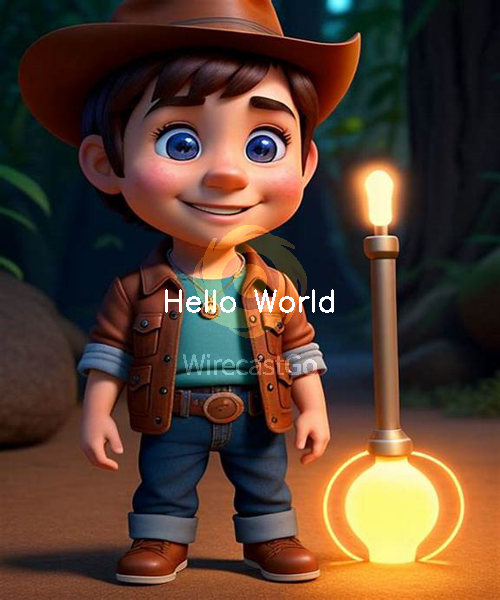

In [153]:
# now we will draw some text on the image and it will be centered 

font = cv2.FONT_HERSHEY_SIMPLEX
text = "Hello World"
font_scale = 1
font_thickness = 2
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_x = (img_width - text_size[0]) // 2
text_y = (img_height + text_size[1]) // 2

cv2.putText(img, text, (text_x, text_y), font, font_scale, (255, 255, 255), font_thickness)
img_with_text = Image.fromarray(img)
img_with_text